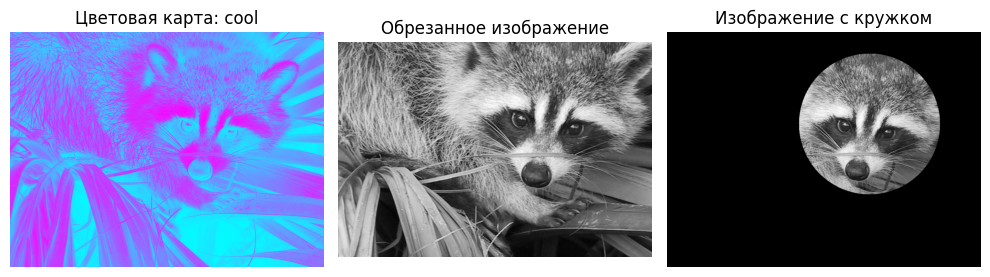

In [23]:
## 1. Scipy - обрезка изображения

import matplotlib.pyplot as plt
from scipy.datasets import face  # Используем актуальный метод для загрузки изображения
import numpy as np

# Загрузка изображения
face_image = face(gray=True)  # Загружаем изображение в оттенках серого

# Отображение оригинального изображения
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(face_image, cmap='cool')  # Используем цветовую карту 'cool'
plt.title('Цветовая карта: cool')
plt.axis('off')

# Обрезка изображения
crop_face = face_image[100:-100, 100:-100]

# Отображение обрезанного изображения
plt.subplot(1, 3, 2)
plt.imshow(crop_face, cmap='gray')  # Используем цветовую карту 'gray'
plt.title('Обрезанное изображение')
plt.axis('off')

# Создание маски для круга
sy, sx = face_image.shape
y, x = np.ogrid[0:sy, 0:sx]
centerx, centery = (660, 300)
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2

# Применение маски к изображению
face_image[mask] = 0

# Отображение изображения с выделенным кружком
plt.subplot(1, 3, 3)
plt.imshow(face_image, cmap='gray')  # Используем цветовую карту 'gray'
plt.title('Изображение с кружком')
plt.axis('off')

plt.tight_layout()  # Улучшаем расположение подграфиков
plt.show()


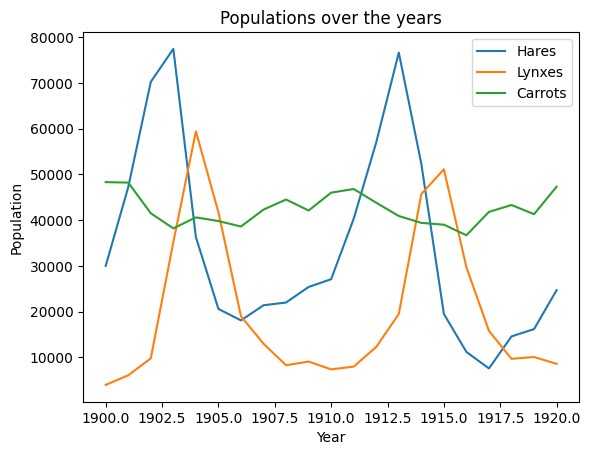

Hares: mean=34080.95238095238, std=20897.906458089667
Lynxes: mean=20166.666666666668, std=16254.591536908763
Carrots: mean=42400.0, std=3322.5062255844787
Hares max population year: 1903.0
Lynxes max population year: 1904.0
Carrots max population year: 1900.0
Years with population above 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Hares lowest population years: [1917. 1916.]
Lynxes lowest population years: [1900. 1901.]
Carrots lowest population years: [1916. 1903.]


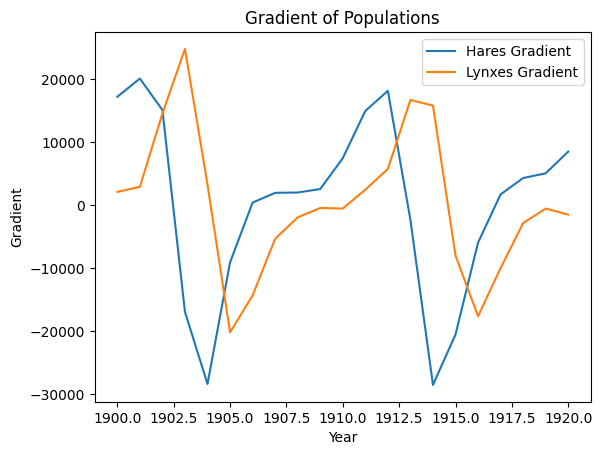

Correlation between hares and lynxes gradients: -0.05136252586288724


In [3]:
## 2. Работа со статистикой

import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T

# Построение графика
plt.plot(year, hares, label='Hares')
plt.plot(year, lynxes, label='Lynxes')
plt.plot(year, carrots, label='Carrots')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Populations over the years')
plt.show()

# Среднее и стандартное отклонение
mean_hares = np.mean(hares)
std_hares = np.std(hares)
mean_lynxes = np.mean(lynxes)
std_lynxes = np.std(lynxes)
mean_carrots = np.mean(carrots)
std_carrots = np.std(carrots)

print(f'Hares: mean={mean_hares}, std={std_hares}')
print(f'Lynxes: mean={mean_lynxes}, std={std_lynxes}')
print(f'Carrots: mean={mean_carrots}, std={std_carrots}')

# Год с наибольшей популяцией
max_hares_year = year[np.argmax(hares)]
max_lynxes_year = year[np.argmax(lynxes)]
max_carrots_year = year[np.argmax(carrots)]

print(f'Hares max population year: {max_hares_year}')
print(f'Lynxes max population year: {max_lynxes_year}')
print(f'Carrots max population year: {max_carrots_year}')

# Годы, когда популяция превышает 50000
years_above_50000 = year[np.any(data[:, 1:] > 50000, axis=1)]
print(f'Years with population above 50000: {years_above_50000}')

# Топ 2 года с наименьшей популяцией
lowest_hares_years = year[np.argsort(hares)[:2]]
lowest_lynxes_years = year[np.argsort(lynxes)[:2]]
lowest_carrots_years = year[np.argsort(carrots)[:2]]

print(f'Hares lowest population years: {lowest_hares_years}')
print(f'Lynxes lowest population years: {lowest_lynxes_years}')
print(f'Carrots lowest population years: {lowest_carrots_years}')

# Градиент численности
hares_gradient = np.gradient(hares)
lynxes_gradient = np.gradient(lynxes)

# Построение графика
plt.plot(year, hares_gradient, label='Hares Gradient')
plt.plot(year, lynxes_gradient, label='Lynxes Gradient')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Gradient')
plt.title('Gradient of Populations')
plt.show()

# Корреляция
correlation = np.corrcoef(hares_gradient, lynxes_gradient)[0, 1]
print(f'Correlation between hares and lynxes gradients: {correlation}')

<ipython-input-5-2e5fb4f001e0>:22: RuntimeWarning: overflow encountered in square
  z = z**2 + c  # Итерация z = z^2 + c
<ipython-input-5-2e5fb4f001e0>:22: RuntimeWarning: invalid value encountered in square
  z = z**2 + c  # Итерация z = z^2 + c


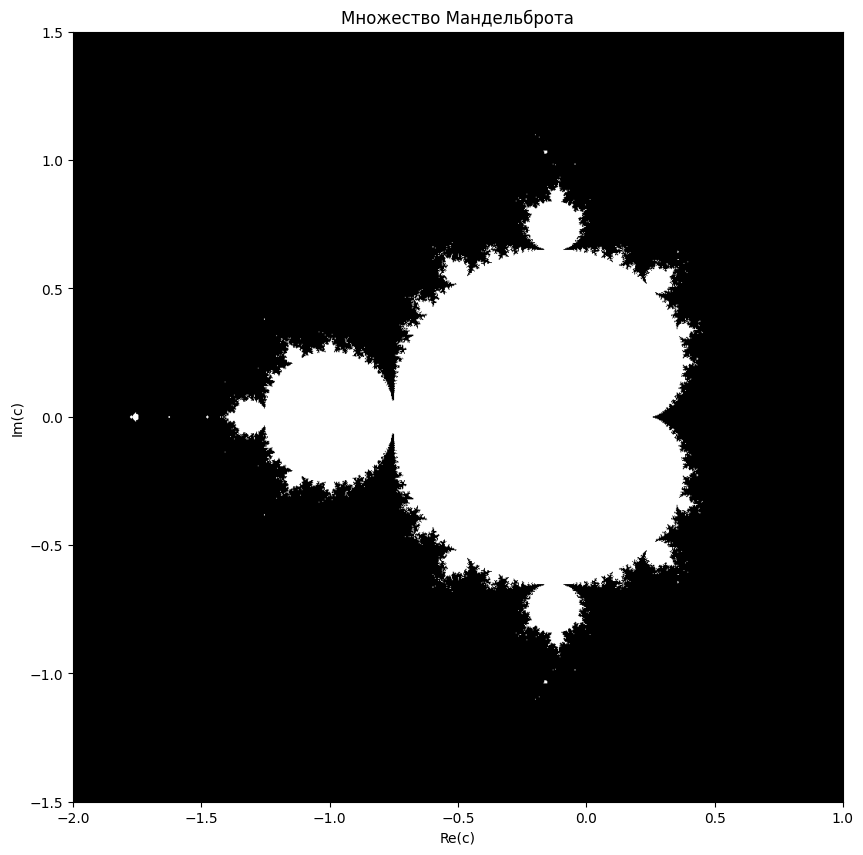

In [5]:
## 3. Множество Мандельброта

import numpy as np
import matplotlib.pyplot as plt

# Параметры
N_max = 50  # Максимальное количество итераций
some_threshold = 50  # Порог для определения принадлежности к множеству

# Создание сетки комплексных чисел c = x + iy
x = np.linspace(-2, 1, 1000)  # Диапазон по оси x
y = np.linspace(-1.5, 1.5, 1000)  # Диапазон по оси y
c = x[:, np.newaxis] + 1j * y[np.newaxis, :]  # Создание сетки комплексных чисел

# Инициализация массива z
z = np.zeros_like(c, dtype=complex)

# Итерации для построения множества Мандельброта
mask = np.zeros(c.shape, dtype=bool)  # Маска для точек, принадлежащих множеству

for j in range(N_max):
    z = z**2 + c  # Итерация z = z^2 + c
    mask |= (np.abs(z) > some_threshold)  # Обновление маски

# Инвертируем маску, чтобы точки, принадлежащие множеству, были True
mask = ~mask

# Визуализация множества Мандельброта
plt.figure(figsize=(10, 10))
plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5], cmap='gray')
plt.title('Множество Мандельброта')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.gray()  # Используем grayscale для визуализации
plt.savefig('mandelbrot.png')  # Сохранение изображения
plt.show()